In [1]:
import torch
import torch_directml
dml = torch_directml.device()

In [2]:
tensor1 = torch.tensor([1]).to(dml) # Note that dml is a variable, not a string!
tensor2 = torch.tensor([2]).to(dml)

In [3]:
dml_algebra = tensor1 + tensor2
dml_algebra.item()

3

In [4]:
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
def load_audio_files(path: str, label:str):

    dataset = []
    walker = sorted(str(p) for p in Path(path).glob(f'*.wav'))

    for i, file_path in enumerate(walker):
        path, filename = os.path.split(file_path)
    
        # Load audio
        waveform, sample_rate = torchaudio.load(file_path)
        dataset.append([waveform, sample_rate, label])
        
    return dataset

In [6]:
import os
import re
root = '/mnt/c/Downloads/cs8803-audio-files/'

re_blender = r'^blender'
re_noise = r'^nothing'
re_garbage = r'^garbage'
blender, noise, garbage = [],[],[]
for i in os.listdir(root):
    if re.search(re_blender, i):
        blender += load_audio_files(root+i+'/', 'blender')
    elif re.search(re_noise, i):
        noise += load_audio_files(root+i+'/', 'nothing')
    elif re.search(re_garbage, i):
        garbage += load_audio_files(root+i+'/', 'garbage')

In [7]:
print(f'Length of blender dataset: {len(blender)}')
print(f'Length of nothing dataset: {len(noise)}')
print(f'Length of garbage dataset: {len(garbage)}')

Length of blender dataset: 110
Length of nothing dataset: 103
Length of garbage dataset: 10


In [8]:
print(len(blender[0][0][0]))

220500


In [9]:
train_blender = torch.utils.data.DataLoader(blender, batch_size=1,
                                            shuffle=True, num_workers=0)
train_noise = torch.utils.data.DataLoader(noise, batch_size=1,
                                            shuffle=True, num_workers=0)
train_garbage = torch.utils.data.DataLoader(garbage, batch_size=1,
                                            shuffle=True, num_workers=0)

In [10]:
blender_waveform = blender[0][0]
blender_sample_rate = blender[0][1]
print(f'Yes Waveform: {blender_waveform}')
print(f'Yes Sample Rate: {blender_sample_rate}')
print(f'Yes Label: {blender[0][2]}\n')

noise_waveform = noise[0][0]
noise_sample_rate = noise[0][1]
print(f'No Waveform: {noise_waveform}')
print(f'No Sample Rate: {noise_sample_rate}')
print(f'No Label: {noise[0][2]}')

garbage_waveform = garbage[0][0]
garbage_sample_rate = garbage[0][1]
print(f'No Waveform: {garbage_waveform}')
print(f'No Sample Rate: {garbage_sample_rate}')
print(f'No Label: {garbage[0][2]}')

Yes Waveform: tensor([[-0.0012, -0.0011, -0.0011,  ...,  0.0409,  0.0460,  0.0458]])
Yes Sample Rate: 44100
Yes Label: blender

No Waveform: tensor([[0.0006, 0.0007, 0.0005,  ..., 0.0031, 0.0031, 0.0032]])
No Sample Rate: 44100
No Label: nothing
No Waveform: tensor([[ 0.0005,  0.0007,  0.0006,  ..., -0.1150, -0.0946, -0.1294]])
No Sample Rate: 44100
No Label: garbage


In [11]:
def show_waveform(waveform, sample_rate, label):
    print("Waveform: {}\nSample rate: {}\nLabels: {} \n".format(waveform, sample_rate, label))
    new_sample_rate = sample_rate/10
   
    # Resample applies to a single channel, we resample first channel here
    channel = 0
    waveform_transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

    print("Shape of transformed waveform: {}\nSample rate: {}".format(waveform_transformed.size(), new_sample_rate))

    plt.figure()
    plt.plot(waveform_transformed[0,:].numpy())

Waveform: tensor([[-0.0012, -0.0011, -0.0011,  ...,  0.0409,  0.0460,  0.0458]])
Sample rate: 44100
Labels: blender 

Shape of transformed waveform: torch.Size([1, 22050])
Sample rate: 4410.0


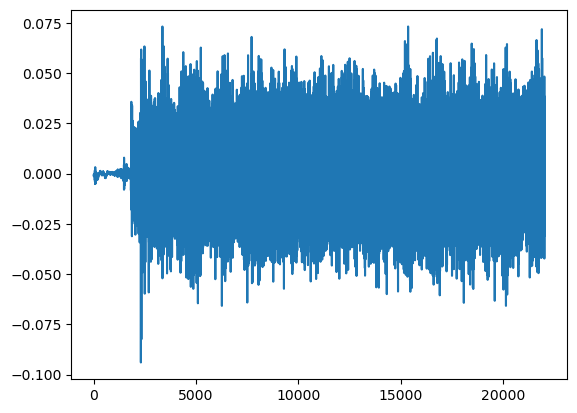

In [12]:
show_waveform(blender_waveform, blender_sample_rate, 'blender')

Waveform: tensor([[0.0006, 0.0007, 0.0005,  ..., 0.0031, 0.0031, 0.0032]])
Sample rate: 44100
Labels: noise 

Shape of transformed waveform: torch.Size([1, 22050])
Sample rate: 4410.0


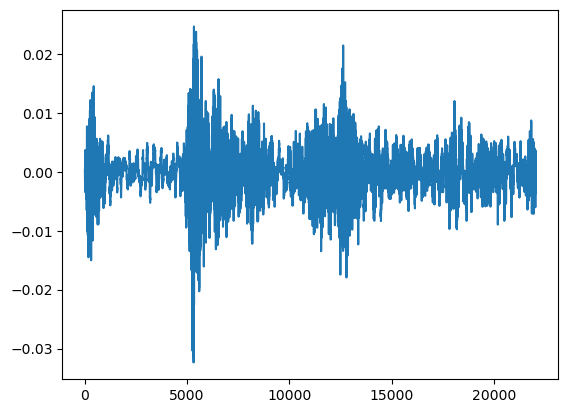

In [13]:
show_waveform(noise_waveform, noise_sample_rate, 'noise')

Waveform: tensor([[ 0.0005,  0.0007,  0.0006,  ..., -0.1150, -0.0946, -0.1294]])
Sample rate: 44100
Labels: garbage 

Shape of transformed waveform: torch.Size([1, 22050])
Sample rate: 4410.0


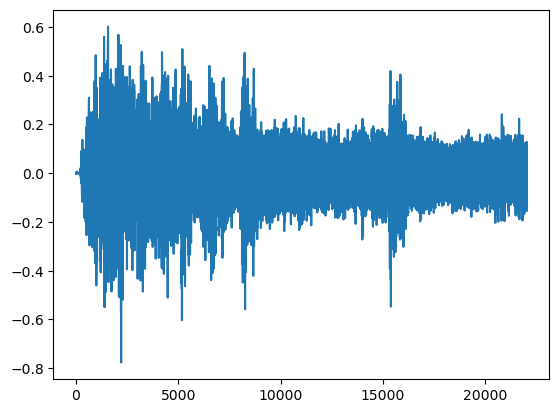

In [14]:
show_waveform(garbage_waveform, garbage_sample_rate, 'garbage')

In [15]:
def show_spectrogram(waveform_classA, waveform_classB, waveform_classC):
    blender_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classA)
    print("\nShape of blender spectrogram: {}".format(blender_spectrogram.size()))
    
    noise_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classB)
    print("Shape of noise spectrogram: {}".format(noise_spectrogram.size()))

    garbage_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classC)
    print("Shape of garbage spectrogram: {}".format(garbage_spectrogram.size()))

    plt.figure()
    plt.subplot(1, 3, 1)
    plt.title("Features of {}".format('blender'))
    plt.imshow(blender_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')
    
    plt.subplot(1, 3, 2)
    plt.title("Features of {}".format('noise'))
    plt.imshow(noise_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')  

    plt.subplot(1, 3, 3)
    plt.title("Features of {}".format('garbage'))
    plt.imshow(garbage_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')  


Shape of blender spectrogram: torch.Size([1, 201, 1103])
Shape of noise spectrogram: torch.Size([1, 201, 1103])
Shape of garbage spectrogram: torch.Size([1, 201, 1103])


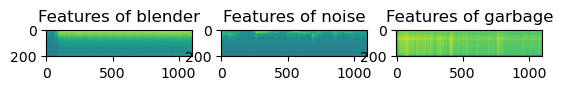

In [16]:
show_spectrogram(blender_waveform, noise_waveform, garbage_waveform)

In [17]:
def show_melspectrogram(waveform,sample_rate):
    mel_spectrogram = torchaudio.transforms.MelSpectrogram()(waveform)
    print("Shape of spectrogram: {}".format(mel_spectrogram.size()))

    plt.figure()
    plt.imshow(mel_spectrogram[0].log2().numpy(), cmap='viridis')

Shape of spectrogram: torch.Size([1, 128, 1103])


/home/nschdeva/anaconda3/envs/mci/lib/python3.9/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


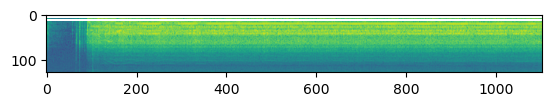

In [18]:
show_melspectrogram(blender_waveform, blender_sample_rate)

Shape of spectrogram: torch.Size([1, 128, 1103])


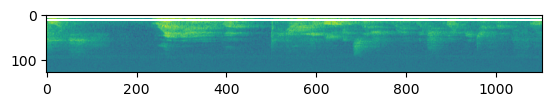

In [19]:
show_melspectrogram(noise_waveform, noise_sample_rate)

Shape of spectrogram: torch.Size([1, 128, 1103])


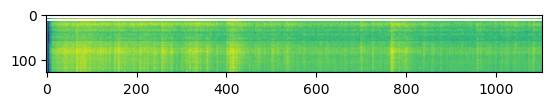

In [20]:
show_melspectrogram(garbage_waveform, garbage_sample_rate)

In [21]:
def show_mfcc(waveform,sample_rate):
    mfcc_spectrogram = torchaudio.transforms.MFCC(sample_rate)(waveform)
    print("Shape of spectrogram: {}".format(mfcc_spectrogram.size()))

    plt.figure()
    plt.gcf()
    plt.imshow(mfcc_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')
    
    plt.figure()
    plt.plot(mfcc_spectrogram.log2()[0,:,:].numpy())
    plt.draw()

Shape of spectrogram: torch.Size([1, 40, 1103])


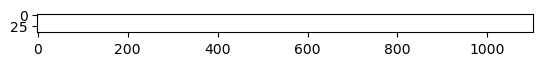

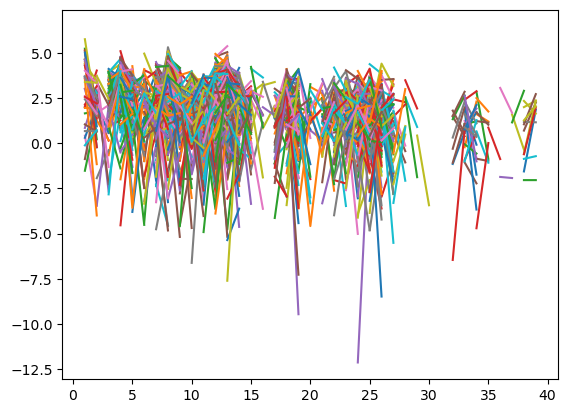

In [22]:
show_mfcc(noise_waveform,  noise_sample_rate)

Shape of spectrogram: torch.Size([1, 40, 1103])


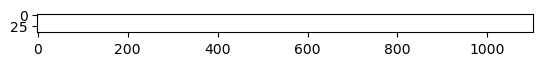

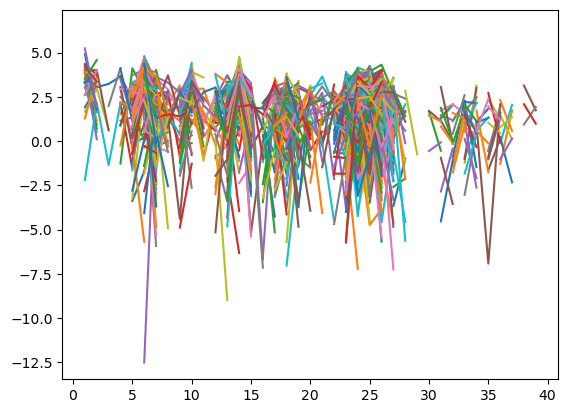

In [23]:
show_mfcc(blender_waveform,  blender_sample_rate)

Shape of spectrogram: torch.Size([1, 40, 1103])


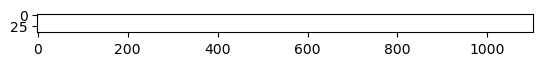

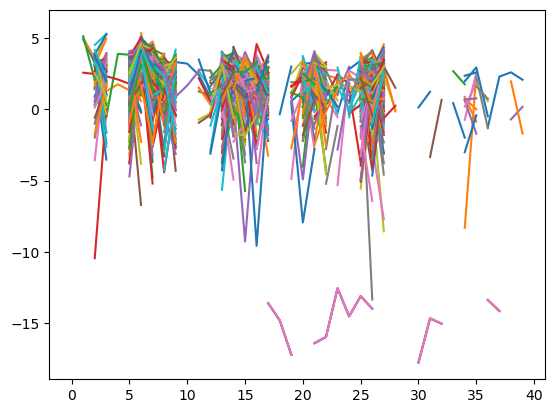

In [24]:
show_mfcc(garbage_waveform,  garbage_sample_rate)

In [25]:
def create_spectrogram_images(trainloader, label_dir):
    #make directory
    directory = f'./data/spectrograms/{label_dir}/'
    if(os.path.isdir(directory)):
        print("Data exists for", label_dir)
    else:
        os.makedirs(directory, mode=0o777, exist_ok=True)
        
        for i, data in enumerate(trainloader):

            waveform = data[0]
            sample_rate = data[1][0]
            label = data[2]

            # create transformed waveforms
            spectrogram_tensor = torchaudio.transforms.Spectrogram()(waveform)     
            
            # fig = plt.figure()
            plt.imsave(f'./data/spectrograms/{label_dir}/spec_img{i}.png', spectrogram_tensor[0].log2()[0,:,:].numpy(), cmap='viridis')

In [26]:
def create_mfcc_images(trainloader, label_dir):
    #make directory
    os.makedirs(f'./data/mfcc_spectrograms/{label_dir}/', mode=0o777, exist_ok=True)
    
    for i, data in enumerate(trainloader):

        waveform = data[0]
        sample_rate = data[1][0]
        label = data[2]
        
        mfcc_spectrogram = torchaudio.transforms.MFCC(sample_rate= sample_rate)(waveform)

        plt.figure()
        fig1 = plt.gcf()
        plt.imshow(mfcc_spectrogram[0].log2()[0,:,:].numpy(), cmap='viridis')
        plt.draw()
        fig1.savefig(f'./data/mfcc_spectrograms/{label_dir}/spec_img{i}.png', dpi=100)
 
        #spectorgram_train.append([spectrogram_tensor, label, sample_rate, ID])

In [27]:
def create_melspec_images(trainloader, label_dir):
    #make directory
    directory = f'./data/mel_spectrograms/{label_dir}/'
    if(os.path.isdir(directory)):
        print("Data exists for", label_dir)
    else:
        os.makedirs(directory, mode=0o777, exist_ok=True)
    
    for i, data in enumerate(trainloader):

        waveform = data[0]
        sample_rate = data[1][0]
        label = data[2]
        
        melspec_tensors = torchaudio.transforms.MelSpectrogram(sample_rate)(waveform)

        plt.imsave(f'./data/mel_spectrograms/{label_dir}/spec_img{i}.png', melspec_tensors[0].log2()[0,:,:].numpy(), cmap='viridis')
 
        #spectorgram_train.append([spectrogram_tensor, label, sample_rate, ID])

In [32]:
create_spectrogram_images(train_blender, 'blender')
create_spectrogram_images(train_noise, 'noise')
create_spectrogram_images(train_garbage, 'garbage')

/home/nschdeva/anaconda3/envs/mci/lib/python3.9/site-packages/matplotlib/colors.py:1370: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/home/nschdeva/anaconda3/envs/mci/lib/python3.9/site-packages/matplotlib/colors.py:1371: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


In [29]:
# create_mfcc_images(train_blender, 'blender')
# create_mfcc_images(train_noise, 'noise')

In [30]:
# create_melspec_images(train_blender, 'blender')
# create_melspec_images(train_noise, 'noise')

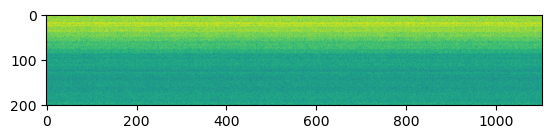

In [31]:
for i, data in enumerate(train_blender):
    waveform = data[0]
    sample_rate = data[1][0]
    label = data[2]

    # create transformed waveforms
    spectrogram_tensor = torchaudio.transforms.Spectrogram()(waveform)     
    
    # fig = plt.figure()
    plt.imshow(spectrogram_tensor[0].log2()[0,:,:].numpy(), cmap='viridis')